/tmp/ipykernel_42/1779139688.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


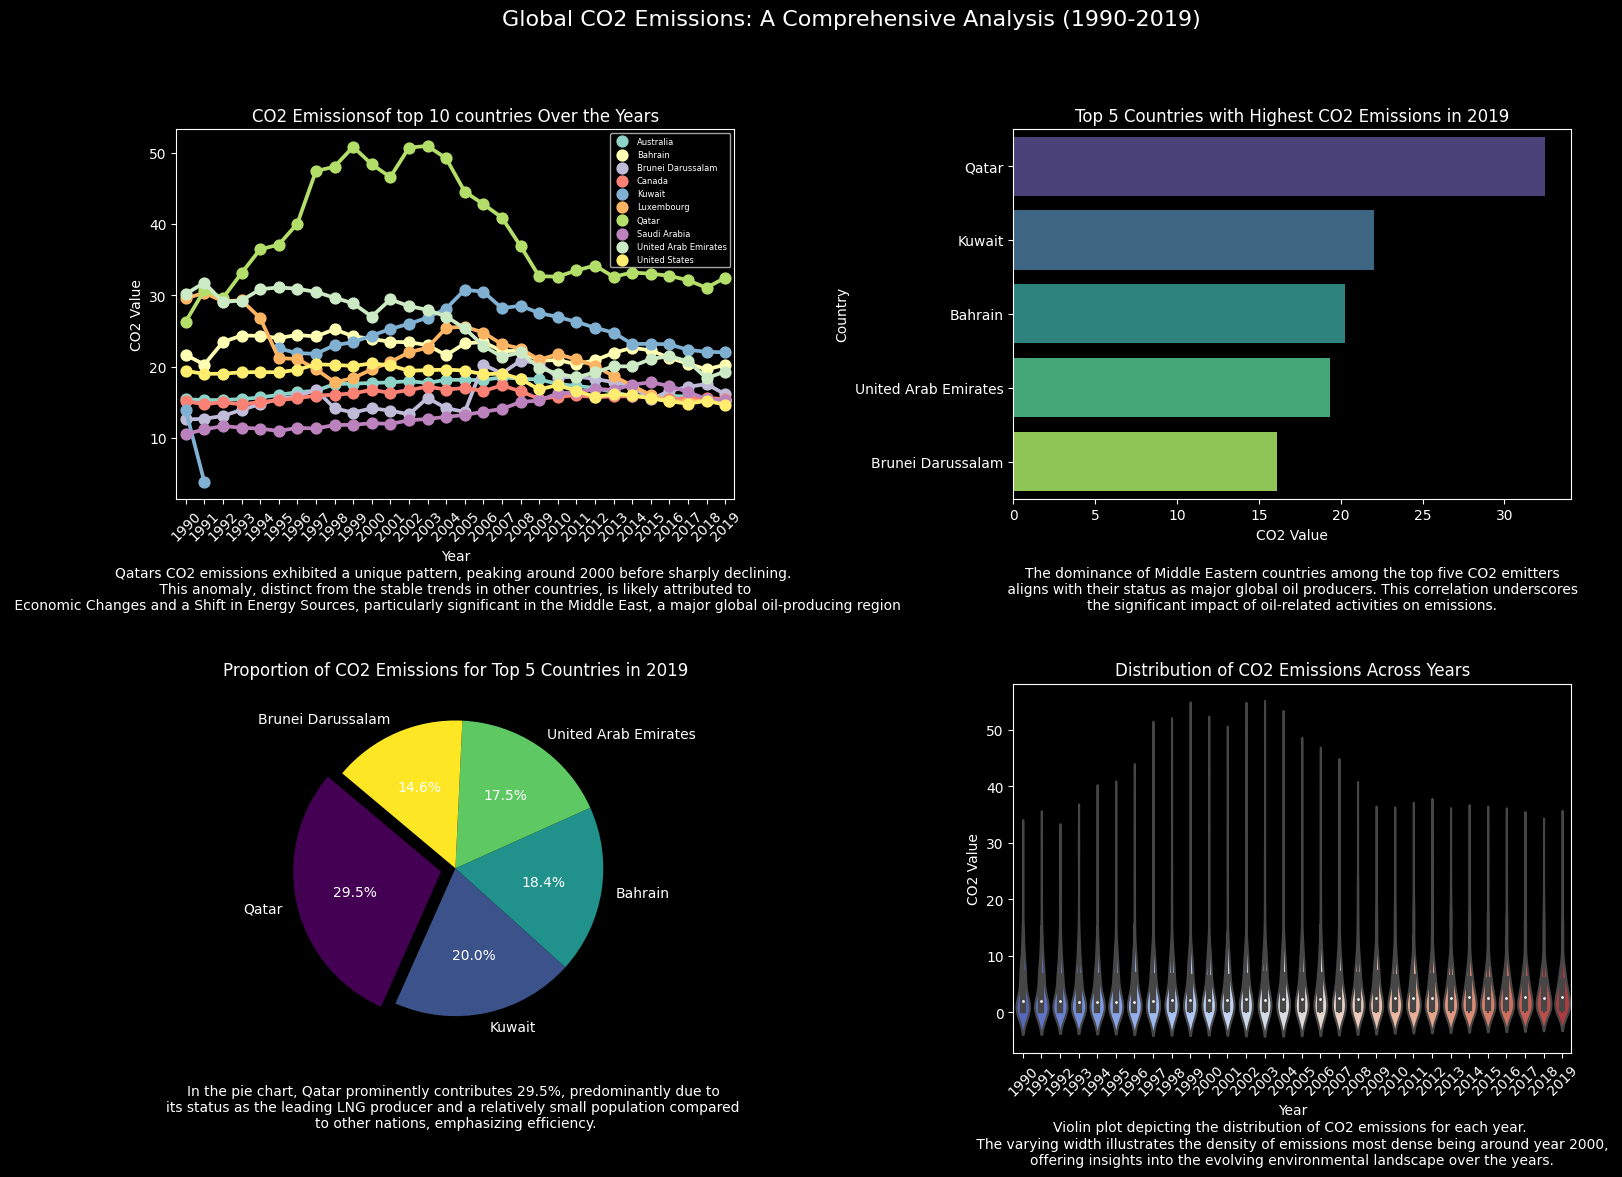

In [3]:
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/co2-emission-around-the-world/CO2_emission.csv')
# dropping redundant columns
df.drop(['country_code','Indicator Name','2019.1'],axis=1,inplace=True)

col_year = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003',
            '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
            '2018','2019']
df1 = pd.melt(df,id_vars=['Country Name'],value_vars=col_year,var_name='Year',value_name='CO2 Value')


# Create a 2x2 subplot for all the visualizations
plt.style.use('dark_background')

fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
country = round(df1.groupby('Country Name')['CO2 Value'].mean().reset_index().sort_values('CO2 Value',ascending=False),2)
country = country.head(10).reset_index(drop=True)
# Line plot showing the trend of CO2 emissions over the years for a specific country
year_country = df1.groupby(['Year','Country Name'])['CO2 Value'].mean().reset_index()
year_country = year_country[year_country['Country Name'].isin(country['Country Name'])]
sns.pointplot(data=year_country,x='Year',y='CO2 Value',hue='Country Name', ax=axes[0, 0])


axes[0, 0].set_title('CO2 Emissionsof top 10 countries Over the Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CO2 Value')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axes[0, 0].text(0.5, -0.3, 'Qatars CO2 emissions exhibited a unique pattern, peaking around 2000 before sharply declining. \n This anomaly, distinct from the stable trends in other countries, is likely attributed to \n Economic Changes and a Shift in Energy Sources, particularly significant in the Middle East, a major global oil-producing region', transform=axes[0, 0].transAxes, ha="center")
axes[0, 0].legend(fontsize=6)  # Set legend font size to 'small'


# Bar plot showing the total CO2 emissions for the top 5 countries in 2019
top_countries_2019 = df1[df1['Year'] == '2019'].nlargest(5, 'CO2 Value')
sns.barplot(data=top_countries_2019, x='CO2 Value', y='Country Name', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Countries with Highest CO2 Emissions in 2019')
axes[0, 1].set_xlabel('CO2 Value')
axes[0, 1].set_ylabel('Country')
axes[0, 1].text(0.5, -0.3, 'The dominance of Middle Eastern countries among the top five CO2 emitters\n aligns with their status as major global oil producers. This correlation underscores \nthe significant impact of oil-related activities on emissions.', transform=axes[0, 1].transAxes, ha="center")


# Pie chart showing the proportion of CO2 emissions for the top 5 countries in 2019
explode = (0.1, 0, 0, 0, 0)
colors = plt.cm.viridis(np.linspace(0, 1, 5))
axes[1, 0].pie(top_countries_2019['CO2 Value'], labels=top_countries_2019['Country Name'], autopct='%1.1f%%',
               startangle=140, explode=explode, colors=colors)
axes[1, 0].set_title('Proportion of CO2 Emissions for Top 5 Countries in 2019')
axes[1,0].text(0.5, -0.2, 'In the pie chart, Qatar prominently contributes 29.5%, predominantly due to \nits status as the leading LNG producer and a relatively small population compared \nto other nations, emphasizing efficiency.', transform=axes[1,0].transAxes, ha="center")

# Violin plot showing the distribution of CO2 emissions for each year
sns.violinplot(data=df1, x='Year', y='CO2 Value', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of CO2 Emissions Across Years')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('CO2 Value')
axes[1, 1].text(0.5, -0.3, 'Violin plot depicting the distribution of CO2 emissions for each year. \n The varying width illustrates the density of emissions most dense being around year 2000, \noffering insights into the evolving environmental landscape over the years.', transform=axes[1, 1].transAxes, ha="center", color='white')

axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
plt.suptitle('Global CO2 Emissions: A Comprehensive Analysis (1990-2019)', fontsize=16)
plt.style.use('dark_background')

# Adjust layout
plt.tight_layout()

# Save the infographic as a PNG file
plt.savefig("your-student-id_combined.png", dpi=300)
plt.show()
